In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# import dataset and split into the Training and Test set
df = pd.read_csv('boston.csv')
print('The shape of raw data: ', df.shape)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('The shape of Training data: ',X_train.shape, y_train.shape)
print('The shape of Test data: ',X_test.shape, y_test.shape)
print('X_train', X_train[:2])

The shape of raw data:  (506, 14)
The shape of Training data:  (404, 13) (404,)
The shape of Test data:  (102, 13) (102,)
X_train [[3.5809e-01 0.0000e+00 6.2000e+00 1.0000e+00 5.0700e-01 6.9510e+00
  8.8500e+01 2.8617e+00 8.0000e+00 3.0700e+02 1.7400e+01 3.9170e+02
  9.7100e+00]
 [1.5876e-01 0.0000e+00 1.0810e+01 0.0000e+00 4.1300e-01 5.9610e+00
  1.7500e+01 5.2873e+00 4.0000e+00 3.0500e+02 1.9200e+01 3.7694e+02
  9.8800e+00]]


In [3]:
# Normalization
std_x = StandardScaler()
X_train = std_x.fit_transform(X_train) #fit and transform
X_test = std_x.transform(X_test) #use the same fit metrics as above to transform
print('X_train', X_train[:2])

X_train [[-0.37257438 -0.49960763 -0.70492455  3.66450153 -0.42487874  0.93567804
   0.69366877 -0.4372179  -0.16224243 -0.56165616 -0.48463784  0.3716906
  -0.41100022]
 [-0.39709866 -0.49960763 -0.04487755 -0.27288841 -1.24185891 -0.49118121
  -1.8355285   0.73005474 -0.62464765 -0.57337637  0.33649132  0.20501196
  -0.38768057]]


In [4]:
# Add bias
def add_bias(X):
    return np.concatenate((X, np.ones((X.shape[0],1))), axis = 1)
X_train = add_bias(X_train)
X_test = add_bias(X_test)
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)
print('The shape of Training data: ',X_train.shape, y_train.shape)
print('The shape of Test data: ',X_test.shape, y_test.shape)
print('X_train', X_train[:2])

The shape of Training data:  (404, 14) (404, 1)
The shape of Test data:  (102, 14) (102, 1)
X_train [[-0.37257438 -0.49960763 -0.70492455  3.66450153 -0.42487874  0.93567804
   0.69366877 -0.4372179  -0.16224243 -0.56165616 -0.48463784  0.3716906
  -0.41100022  1.        ]
 [-0.39709866 -0.49960763 -0.04487755 -0.27288841 -1.24185891 -0.49118121
  -1.8355285   0.73005474 -0.62464765 -0.57337637  0.33649132  0.20501196
  -0.38768057  1.        ]]


In [5]:
class multipleLinearRegression():

    def __init__(self):
        # No instance Variables required
        pass

    def forward(self,X,y,W):
        """
        Parameters:
        X (array) : Independent Features
        y (array) : Dependent Features/ Target Variable
        W (array) : Weights 

        Returns:
        J (float) : Calculated cost for y and y_pred
        y_pred (array) : Predicted Target Variable
        """
        y_pred = X.dot(W)
        errors = np.subtract(y_pred, y)
        errors = errors.reshape(len(errors),1)
        J = 1/(2 * X.shape[0]) * errors.T.dot(errors) #J = 1 / (2 * m) * np.sum(sqrErrors) 
        return J, y_pred

    def gradient_descent(self, X, y_pred, y_true, W, alpha):
        """
        Parameters:
        X (array) : Independent Features
        y_pred (array) : Predicted Target Variable
        y_true (array) : Dependent Features/ Target Variable
        W (array) : Weights
        alpha (float) : learning rate
   
        Returns:
        W (array) : Update Values of Weight
        """
        errors = np.subtract(y_pred, y_true)
        sum_delta = (alpha / X.shape[0]) * X.transpose().dot(errors)
        W = W - sum_delta
        return W

    def train(self, X, y, epochs=10, alpha=0.001, random_state=0):
        """
        Parameters:
        X (array) : Independent Feature
        y (array) : Dependent Features/ Target Variable
        epochs (int) : Number of epochs for training, default value is 10
        alpha (float) : learning rate, default value is 0.001

        Returns:
        y_pred (array) : Predicted Target Variable
        loss (float) : Calculated Sqaured Error Loss for y and y_pred
        """
        num_rows = X.shape[0] #Number of Rows
        num_cols = X.shape[1] #Number of Columns 
        W = np.random.randn(num_cols,1) / np.sqrt(num_rows) #Weight Initialization
    
        #Calculating Loss and Updating Weights
        train_loss = np.zeros(epochs)
        num_epochs = []
        for epoch in range(epochs):
            cost, y_pred = self.forward(X, y, W)
            W = self.gradient_descent(X, y_pred, y, W, alpha)
            train_loss[epoch] = cost
            num_epochs.append(epoch)
        return W, train_loss, num_epochs

    def test(self, X_test, y_test, W_trained):
        """
        Parameters:
        X_test (array) : Independent Features from the Test Set
        y_test (array) : Dependent Features/ Target Variable from the Test Set
        W_trained (array) : Trained Weights
        test_indices (list) : Index to fetch the corresponding values of W_trained,
                          X_test and y_test 

        Returns:
        test_pred (array) : Predicted Target Variable
        test_cost (float) : Calculated Sqaured Error Loss for y and y_pred
        """
        test_cost, test_pred = self.forward(X_test, y_test, W_trained)
        return test_pred, test_cost

    def predict(self, X_sample, W_trained):
        prediction = X_sample.dot(W_trained)
        return prediction

    def plotLoss(self, loss, epochs):
        """
        Parameters:
        loss (list) : Calculated Sqaured Error Loss for y and y_pred
        epochs (list): Number of Epochs

        Returns: None
        Plots a graph of Loss vs Epochs
        """
        plt.plot(epochs, loss)
        plt.xlabel('Number of Epochs')
        plt.ylabel('Cost (J)')
        plt.title('Plot Cost')
        plt.show()

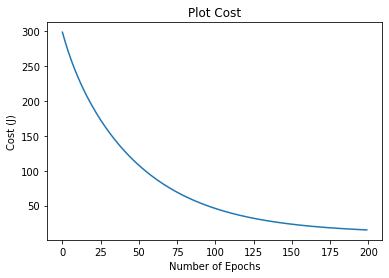

In [6]:
# Fitting Simple Linear Regression to the Training set
regressor = multipleLinearRegression()
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=200, alpha=0.01)
regressor.plotLoss(train_loss, num_epochs)

In [7]:
# Predicting the Test set results
y_pred, test_loss = regressor.test(X_test, y_test, W_trained)

MSE = 49.16843266715802
RMSE = 7.012020583765996
R2_test =  0.3961761611347877
Variance =  50.97522647934429
Bias =  40.78395894106709


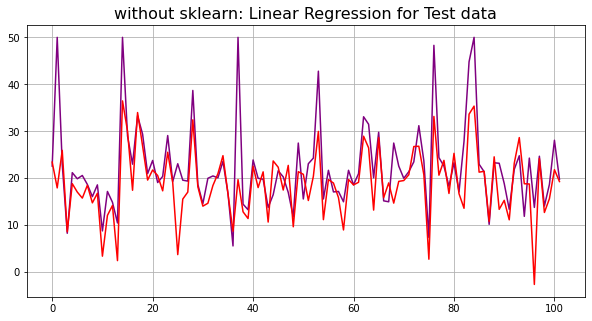

In [8]:
# Evaluation
print("MSE =",metrics.mean_squared_error(y_test, y_pred))
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2_test = 1 - np.sum(np.power(y_pred - y_test,2))/np.sum(np.power(np.mean(y_test) - y_test,2))
print('R2_test = ',R2_test)
Variance = np.var(y_pred)
print('Variance = ', Variance)
SSE = np.mean((np.mean(y_pred) - y_test)** 2)  
Bias = SSE - Variance
print('Bias = ', Bias)

plt.figure(figsize=(10,5))
plt.title('without sklearn: Linear Regression for Test data',fontsize=16)
plt.grid(True)
plt.plot(y_test, color='purple')
plt.plot(y_pred, color='red')
plt.show()